# Tasks 

In [38]:
import numpy as np 
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Task 1: Permutations and Combinations

In [39]:
1 + 1

2

## Task 2: numpy's Normal Distribution

In [40]:
1 + 1

2

## Task 3: t-Test Calculation

**Table 1:** Data for test
|Patient ID	   |0	|1	|2	|3	|4	|5	|6	|7	|8	|9| 
|:-------------|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Before        |63	 |68   |70   |	64 |74	 |67   |70	 |57   |66	 | 65  |
|After	       |64	 |64   |68   |	64 |73   |	70 |72   |	54 |61   |	63 |


**Note:** The above table was created in markdown using a [Codecademy](https://www.codecademy.com/resources/docs/markdown/tables) webpage as guidance. Too keep the numbers centre aligned the *:---:* was used inbetween the vertical lines (*|*). 

In [41]:
# Initialize data to dataframe
data = {'Patient_ID': [0,1,2,3,4,5,6,7,8,9],
        'Before': [63, 64, 70, 64, 74, 67, 70, 57, 66, 65],
        'After': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]}
patient_data = pd.DataFrame(data)
print(patient_data.head(2))

   Patient_ID  Before  After
0           0      63     64
1           1      64     64


### T-test using python

As this data is paired, a paired t-test (or dependent t-test) can be used to compare. This test is useful for before-and-after measurements for a group of people such as in this example ([JMP](https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html)). 

The assumptions of the paired t-test are;
- Patients must be independent. 
- Each of the paired measurements must be obtained from the same patient.
- The measured differences are normally distributed.

Whilst the first two assumptions are two, the below Q-Q plots show that both sets of before and after are normally distributed. 

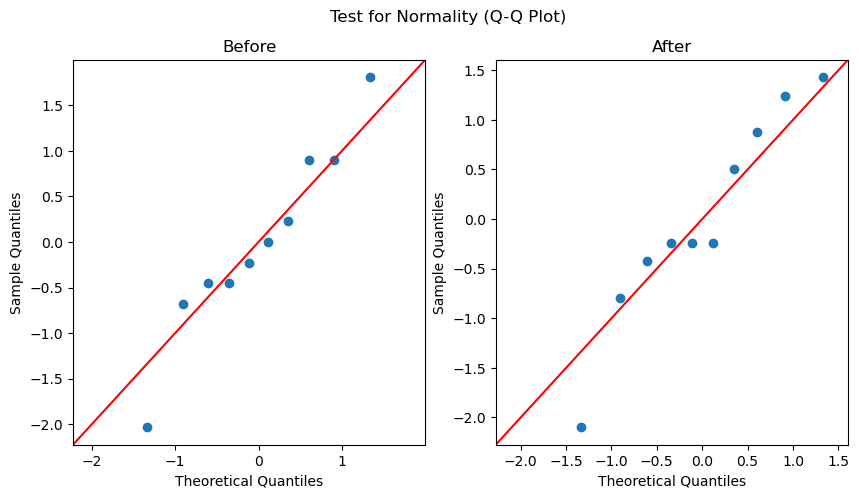

In [42]:
# test for normality assumption 
# Subplotting for matplotlib plots is straightforward, but subplotting with statsmodels plots such as the Q-Q plot can be trickier. 
# The below website address this with subplotting with seaborn as an example, but was modified to work with the qqplot function in 
# statsmodels. 
# Resource; https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Test for Normality (Q-Q Plot)')
sm.qqplot(patient_data['Before'],line='45', fit=True, ax=ax[0])
ax[0].set_title('Before')
sm.qqplot(patient_data['After'],line='45', fit=True, ax=ax[1])
ax[1].set_title('After')
plt.show();

In [43]:
# While the data is mostly on the line, a check of the mean and median (50%) below shows that for both they are similar and as such are 
# approximately noramlly distributed and as all t-test assumptions are made, we can carry out t-test. 

print(patient_data.describe())

       Patient_ID     Before      After
count    10.00000  10.000000  10.000000
mean      4.50000  66.000000  65.300000
std       3.02765   4.666667   5.677441
min       0.00000  57.000000  54.000000
25%       2.25000  64.000000  63.250000
50%       4.50000  65.500000  64.000000
75%       6.75000  69.250000  69.500000
max       9.00000  74.000000  73.000000


To test in python a function can be written with data as input with the associated alpha (normally 5%). While there is an example of how to do this [here](https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/) it needs to be altered 

In [44]:
def paired_ttest(data1, data2, alpha=0.05):
    '''
    Takes two columns (data1, data2) and alpha and computes the paired t-test 
    whilst returning the t-test statisti, degrees of freedom, critica value, 
    and p-value. 

    parameters:
        data1 (DataFrame): column1 of dataframe
        data1 (DataFrame): column1 of dataframe
        alpha (int): significane level (default value of 0.05)

    Returns:
        t_stat: t-test test statistic
        df: degrees of freedom
        cv: critical value
        p: p-value



    Written using: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

'''
    mean1, mean2 = np.mean(data1), np.mean(data2)
    n = len(data1)
    d1 = np.sum([(data1[i]-data2[i])**2 for i in range(n)])
    d2 = np.sum([data1[i]-data2[i] for i in range(n)])
    sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
    sed = sd / np.sqrt(n)
    t_stat = (mean1 - mean2) / sed
    df = n - 1
    cv = stats.t.ppf(1.0 - alpha, df)
    p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0 # *2 as two-sided test
    return t_stat, df, cv, p
    # print(f"The t-test test statistic is {t_stat}, while the critical value is\
    #           {cv} with {df} degrees of freedom with a p-value of {p}")

In [45]:
t_stat, df, cv, p = paired_ttest(patient_data['Before'], patient_data['After'])
print(f"T-test Statistic = {t_stat:.3f} \nDegrees of freedom = {df} \nCritical Value = {cv:.3f} \np-value = {p:.4f}")


T-test Statistic = 0.920 
Degrees of freedom = 9 
Critical Value = 1.833 
p-value = 0.3816


### T-test using Scipy.Stats

In [46]:
# stats.ttest_rel is the paired t-test available from scipi and used for comparison . 
t_test = stats.ttest_rel(patient_data['Before'],patient_data['After'],alternative='two-sided')
print(t_test.)

SyntaxError: invalid syntax (2192002260.py, line 3)

### Conclusion

**Table 2:** Comparision of results
|Method	   |t statistic	|p-value	|df	|
|:-------------|:---:|:---:|:---:|
|Python        |0.920	 |0.3816   |9   |
|*stats.ttest_rel*	       |0.920	 |0.3816   |9   |

Table 2 shows that both the python approach and *stats.ttest_rel* results the same results (the *alternative* parameter was selected as two-sided as the question required to assess for a difference not if heart rates decreased or increased after the exercise program which would result in a one-sided test). 

The null hypothesis (H<sub>0</sub>) is that the population mean of the differences is zero whilst the alternative hypothesis (H<sub>1</sub>) is that the population mean of the differences does not equal which is written as*;\
**Null Hypothesis**: H<sub>0</sub>: μd = 0\
**Alternative Hypothesis**: H<sub>1</sub>: μd ≠ 0 H<sub>h1</sub> 

As the p-value > 0.05 this means that the null hypothesis (H<sub>0</sub>) cannot be rejected and one must conclude that there is no evidence in the data to suggest that the two-week exercise program lowers heart-rate. 

*Link to [site](https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html)

## Task 4: ANOVA

In [37]:
1+1

2